In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
#设置画图时的文字格式为微软雅黑，显示中文字体
#plt.rcParams['axes.unicode_minus'] = False
#plt.rcParams['font.sans-serif']=['SimHei'] 
#plt.style.use("ggplot")
%matplotlib inline

泰坦尼克号由位于爱尔兰岛贝尔法斯特的哈兰德与沃尔夫造船厂兴建，是当时最大的客运轮船。在它的处女航中，泰坦尼克号从英国南安普敦出发，途经法国瑟堡-奥克特维尔以及爱尔兰昆士敦，计划中的目的地为美国纽约。1912年4月14日，船上时间夜里11时40分，泰坦尼克号撞上冰山；4月15日凌晨2时20分，船体断裂成两截后沉入大西洋。泰坦尼克号海难为和平时期死伤人数最惨重的海难之一。船上1500多人丧生。2012年10月16日，沉船遗物以1.89亿美元（约11亿人民币）出售。

泰坦尼克号是人类的美好梦想达到顶峰时的产物，反映了人类掌握世界的强大自信心。它的沉没，向人类展示了大自然的神秘力量，以及命运的不可预测。到泰坦尼克号沉没那天为止，西方世界的人们已经享受了100年的安稳和太平。科技稳定地进步，工业迅速地发展，人们对未来信心十足。泰坦尼克号的沉没惊醒了这一切。这艘“永不沉没的轮船”——埃菲尔铁塔之后最大的人工钢铁构造物，工业时代的伟大成就，因为对自然的威力掉以轻心，满不在乎，所以在第一次处女航中就沉没了。泰坦尼克号将永远让人们牢记人类的傲慢自信所付出的代价。人们永远也忘不了这幅画面：泰坦尼克号在海底昂着头，残破和污迹也掩盖不了她的高贵。这就是她的归宿。历史就这样演变成了传奇。
这场灾难震惊了国际社会。因为它向一些人证明了：人和人们的技术成就无法与自然的力量相比。当时，炼钢技术并不十分成熟，炼出的钢铁在现代的标准根本不能造船。泰坦尼克号上所使用的钢板含有许多化学杂质硫化锌，加上长期浸泡在冰冷的海水中，使得钢板更加脆弱。

## 数据探索分析

In [41]:
data=pd.read_csv('../data/train.csv')  
data.info()  
data.describe()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


C:\Users\j7jiang\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [42]:
data['Cabin'].isnull().sum()

687

12个变量，其中7个是数值变量，5个是属性变量

+ PassengerId：乘客的编号，对乘客是否幸存完全没有任何作用
+ Survived：预测的目标变量。从平均数可以看出，最后存活的概率大概是38%。
+ Pclass：社会经济地位，这个很明显和生存结果相关啊，有钱人住着更加高级船舱可能会享受着更加高级的服务，因此遇险时往往会受到优待。所以这显然是我们要考虑的一个变量。
+ Name：所有人的名字里都包括了Mr，Mrs和Miss，从中是不是隐约可以看出来一些性别和年龄的信息呢，可以采用one-hot编码
+ Sex：性别这个属性肯定是很重要的，女性的生存几率应该会大大提高。one-hot编码
+ Age：尊老爱幼!这是一个连续变量，是否应该进行bin处理后变成分类变量？然后利用one-hot编码进行处理？同时年龄值只有714个，需要补全
+ SibSp：船上兄弟姐妹或者配偶的数量。
+ Parch：船上父母或者孩子的数量。
+ Ticket：船票的号码有用吗？
+ Fare：船票价格，必须要考虑进去的变量。
+ Cabin：船舱号，这个变量或许透露出了一点船舱等级的信息，不过大量数据缺失，另外是否从会合票价，Pclass强相关？
+ Embarked：登船地点，不知道是否有用

### 可视化

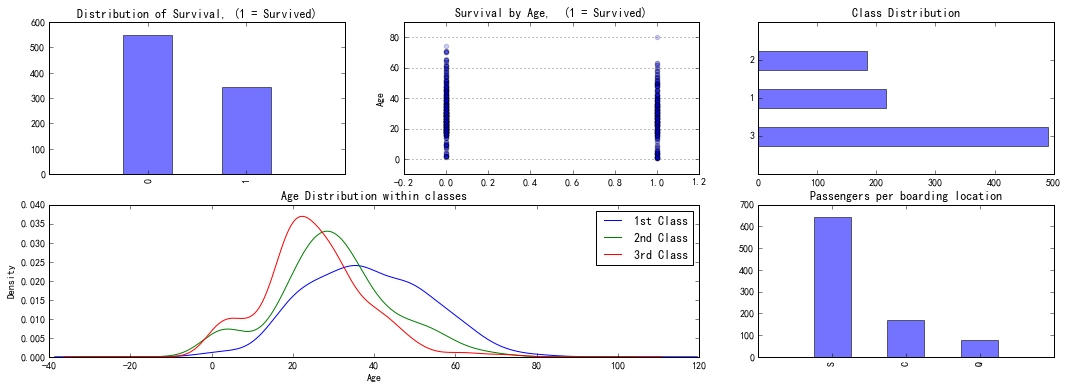

In [3]:
fig = plt.figure(figsize=(18,6)) 
alpha=alpha_scatterplot = 0.2 
alpha_bar_chart = 0.55

# 2x3 的图
ax1 = plt.subplot2grid((2,3),(0,0))
# bar
data.Survived.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax1.set_xlim(-1, 2)
plt.title("Distribution of Survival, (1 = Survived)")    

#age scatter
plt.subplot2grid((2,3),(0,1))
plt.scatter(data.Survived, data.Age, alpha=alpha_scatterplot)
plt.ylabel("Age")
plt.grid(b=True, which='major', axis='y')  
plt.title("Survival by Age,  (1 = Survived)")
# class distribution
ax3 = plt.subplot2grid((2,3),(0,2))
data.Pclass.value_counts().plot(kind="barh", alpha=alpha_bar_chart)
ax3.set_ylim(-1, len(data.Pclass.value_counts()))
plt.title("Class Distribution")
#density by class
plt.subplot2grid((2,3),(1,0), colspan=2)
data.Age[data.Pclass == 1].plot(kind='kde')    
data.Age[data.Pclass == 2].plot(kind='kde')
data.Age[data.Pclass == 3].plot(kind='kde')
plt.xlabel("Age")    
plt.title("Age Distribution within classes")
plt.legend(('1st Class', '2nd Class','3rd Class'),loc='best') 
#boarding location
ax5 = plt.subplot2grid((2,3),(1,2))
data.Embarked.value_counts().plot(kind='bar', alpha=alpha_bar_chart)
ax5.set_xlim(-1, len(data.Embarked.value_counts()))
plt.title("Passengers per boarding location")

### 生还情况

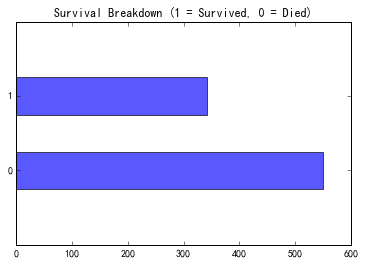

In [4]:
plt.figure(figsize=(6,4))
fig, ax = plt.subplots()
data.Survived.value_counts().plot(kind='barh', color="blue", alpha=.65)
ax.set_ylim(-1, len(data.Survived.value_counts())) 
plt.title("Survival Breakdown (1 = Survived, 0 = Died)")

### 与性别有关吗?

(-1, 2)

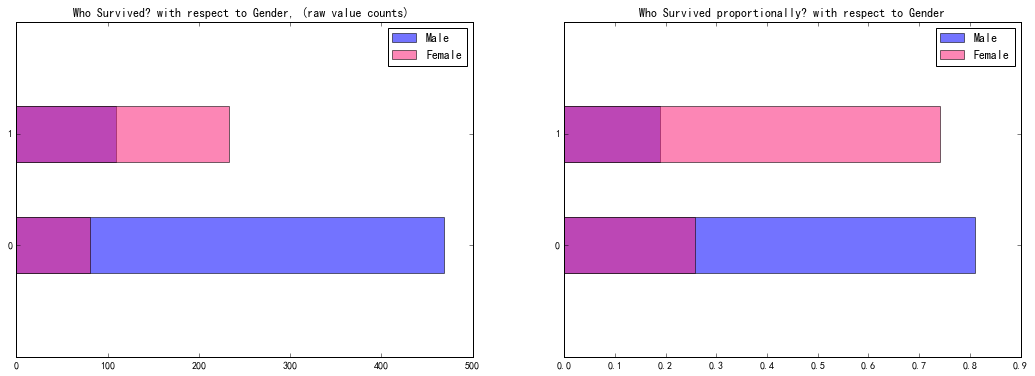

In [5]:
fig = plt.figure(figsize=(18,6))

data_male = data.Survived[data.Sex == 'male'].value_counts().sort_index()
data_female = data.Survived[data.Sex == 'female'].value_counts().sort_index()
#生还人数
ax1 = fig.add_subplot(121)
data_male.plot(kind='barh',label='Male', alpha=0.55)
data_female.plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived? with respect to Gender, (raw value counts) ")
plt.legend(loc='best')
ax1.set_ylim(-1, 2) 

#生还比例
ax2 = fig.add_subplot(122)
(data_male/float(data_male.sum())).plot(kind='barh',label='Male', alpha=0.55)  
(data_female/float(data_female.sum())).plot(kind='barh', color='#FA2379',label='Female', alpha=0.55)
plt.title("Who Survived proportionally? with respect to Gender"); plt.legend(loc='best')
ax2.set_ylim(-1, 2)

### 与社会地位有关吗?

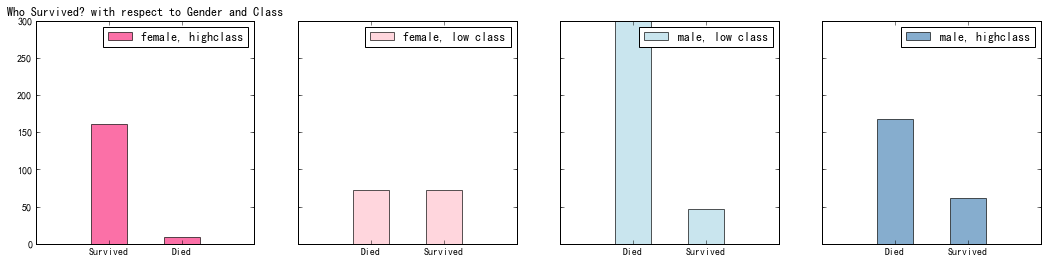

In [6]:
fig = plt.figure(figsize=(18,4))
alpha_level = 0.65
#female hig class
ax1=fig.add_subplot(141)
female_highclass = data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female, highclass', color='#FA2479', alpha=alpha_level)
ax1.set_xticklabels(["Survived", "Died"], rotation=0)
ax1.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')
#female,low class
ax2=fig.add_subplot(142, sharey=ax1)
female_lowclass = data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=alpha_level)
ax2.set_xticklabels(["Died","Survived"], rotation=0)
ax2.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')
#male low class
ax3=fig.add_subplot(143, sharey=ax1)
male_lowclass = data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=alpha_level)
ax3.set_xticklabels(["Died","Survived"], rotation=0)
ax3.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')
#male high class
ax4=fig.add_subplot(144, sharey=ax1)
male_highclass = data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male, highclass', alpha=alpha_level, color='steelblue')
ax4.set_xticklabels(["Died","Survived"], rotation=0)
ax4.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

串起来看问题

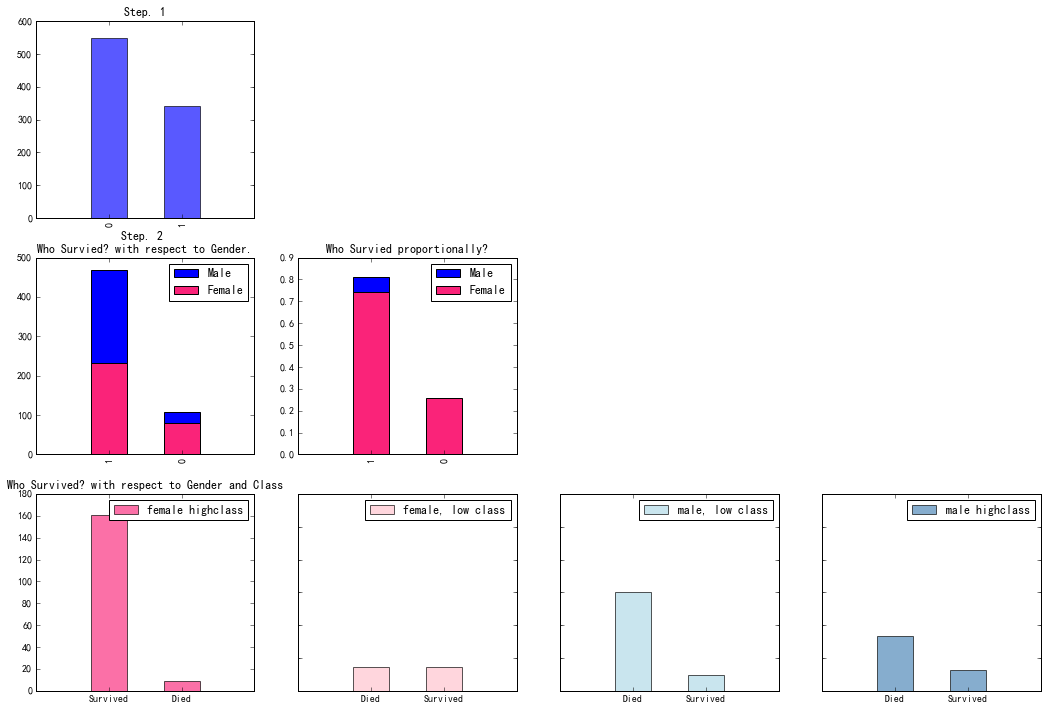

In [7]:
fig = plt.figure(figsize=(18,12))
a = 0.65
# Step 1 ,生还人数对比
ax1 = fig.add_subplot(341)
data.Survived.value_counts().plot(kind='bar', color="blue", alpha=a)
ax1.set_xlim(-1, len(data.Survived.value_counts()))
plt.title("Step. 1")

# Step 2 性别有关没有
ax2 = fig.add_subplot(345)
data.Survived[data.Sex == 'male'].value_counts().plot(kind='bar',label='Male')
data.Survived[data.Sex == 'female'].value_counts().plot(kind='bar', color='#FA2379',label='Female')
ax2.set_xlim(-1, 2)
plt.title("Step. 2 \nWho Survied? with respect to Gender."); plt.legend(loc='best')

ax3 = fig.add_subplot(346)
(data.Survived[data.Sex == 'male'].value_counts()/float(data.Sex[data.Sex == 'male'].size)).plot(kind='bar',label='Male')
(data.Survived[data.Sex == 'female'].value_counts()/float(data.Sex[data.Sex == 'female'].size)).plot(kind='bar', color='#FA2379',label='Female')
ax3.set_xlim(-1,2)
plt.title("Who Survied proportionally?"); plt.legend(loc='best')


# Step 3 与Pclass有关没有
ax4 = fig.add_subplot(349)
female_highclass = data.Survived[data.Sex == 'female'][data.Pclass != 3].value_counts()
female_highclass.plot(kind='bar', label='female highclass', color='#FA2479', alpha=a)
ax4.set_xticklabels(["Survived", "Died"], rotation=0)
ax4.set_xlim(-1, len(female_highclass))
plt.title("Who Survived? with respect to Gender and Class"); plt.legend(loc='best')

ax5 = fig.add_subplot(3,4,10, sharey=ax1)
female_lowclass = data.Survived[data.Sex == 'female'][data.Pclass == 3].value_counts()
female_lowclass.plot(kind='bar', label='female, low class', color='pink', alpha=a)
ax5.set_xticklabels(["Died","Survived"], rotation=0)
ax5.set_xlim(-1, len(female_lowclass))
plt.legend(loc='best')

ax6 = fig.add_subplot(3,4,11, sharey=ax1)
male_lowclass = data.Survived[data.Sex == 'male'][data.Pclass == 3].value_counts()
male_lowclass.plot(kind='bar', label='male, low class',color='lightblue', alpha=a)
ax6.set_xticklabels(["Died","Survived"], rotation=0)
ax6.set_xlim(-1, len(male_lowclass))
plt.legend(loc='best')

ax7 = fig.add_subplot(3,4,12, sharey=ax1)
male_highclass = data.Survived[data.Sex == 'male'][data.Pclass != 3].value_counts()
male_highclass.plot(kind='bar', label='male highclass', alpha=a, color='steelblue')
ax7.set_xticklabels(["Died","Survived"], rotation=0)
ax7.set_xlim(-1, len(male_highclass))
plt.legend(loc='best')

## 数据处理

1. 剔除PassengerId，Ticket这两个个变量，我们不用(不过后面我们需要看那些情况我们预测错误所以这里PassenderId先保留)。
2. 将Embarked变量补全，然后对Survived，Name，Sex， Embarked进行one-hot编码。
3. 对Pclass，Fare,Sibsp和Parch进行归一化处理。
3. 根据Name，Sex，SibSp，Parch预测age将其补全。
4. 对age进行标准化处理。
5. 将未编码的Survived提出当做目标变量

通常的处理需要做的工作:

1. 缺失数据处理
2. 异常数据
3. 数据标准化
4. 数据特征变换
5. 新特征
6. 降维
7. ...

### drop

In [8]:
#data.drop(['PassengerId','Ticket'],axis=1,inplace=True)
data.drop(['Ticket'],axis=1,inplace=True)
#补全Embarked变量  
data.loc[data.Embarked.isnull(),'Embarked']='S'

### one-hot 编码

In [9]:
#one-hot编码  
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

le_sex=LabelEncoder().fit(data['Sex'])
Sex_label=le_sex.transform(data['Sex'])
ohe_sex=OneHotEncoder(sparse=False).fit(Sex_label.reshape(-1,1))
Sex_ohe=ohe_sex.transform(Sex_label.reshape(-1,1))

le_embarked=LabelEncoder().fit(data['Embarked'])
Embarked_label=le_embarked.transform(data['Embarked'])
ohe_embarked=OneHotEncoder(sparse=False).fit(Embarked_label.reshape(-1,1))
Embarked_ohe=ohe_embarked.transform(Embarked_label.reshape(-1,1))


In [10]:
# 把name替换为Mrs,Mr,Miss
def replace_name(x):  
    if 'Mrs' in x:  
       return 'Mrs'  
    elif 'Mr' in x:  
        return 'Mr'  
    else:  
        return 'Miss'  
data['Name']=data['Name'].map(lambda x:replace_name(x))
#one hot encoding，先使用Label encoder
le_name=LabelEncoder().fit(data['Name'])
Name_label=le_name.transform(data['Name'])
ohe_name=OneHotEncoder(sparse=False).fit(Name_label.reshape(-1,1))  
Name_ohe=ohe_name.transform(Name_label.reshape(-1,1))  



In [11]:
Name_ohe

array([[ 0.,  1.,  0.],
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       ..., 
       [ 1.,  0.,  0.],
       [ 0.,  1.,  0.],
       [ 0.,  1.,  0.]])

In [12]:
Name_label

array([1, 2, 0, 2, 1, 1, 1, 0, 2, 2, 0, 0, 1, 1, 0, 2, 0, 1, 2, 2, 1, 1, 0,
       1, 0, 2, 1, 1, 0, 1, 0, 2, 0, 1, 1, 1, 1, 1, 0, 0, 2, 2, 1, 0, 0, 1,
       1, 0, 1, 2, 0, 1, 2, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 2, 1, 0,
       1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 2, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 2, 2, 1, 1, 0, 1,
       1, 1, 2, 0, 2, 1, 1, 1, 1, 0, 1, 0, 0, 2, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       2, 1, 1, 0, 0, 2, 2, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       0, 1, 2, 1, 1, 1, 2, 1, 0, 0, 2, 0, 1, 1, 0, 2, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       2, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 2, 1, 0, 1, 2, 1,
       1, 2, 2, 2, 0, 0, 2, 1, 0, 1, 1, 0, 1, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0,
       0, 1, 0, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 2, 1, 0, 1, 1, 1, 0, 1,
       2, 0,

In [13]:
data['Sex_0']=Sex_ohe[:,0]  
data['Sex_1']=Sex_ohe[:,1]
data['Embarked_0']=Embarked_ohe[:,0]
data['Embarked_1']=Embarked_ohe[:,1]
data['Embarked_2']=Embarked_ohe[:,2]
data['Name_0']=Name_ohe[:,0]
data['Name_1']=Name_ohe[:,1]
data['Name_2']=Name_ohe[:,2]

In [14]:
data['Pclass']=data['Pclass'].astype(str)

In [15]:
oh_pclass=OneHotEncoder(sparse=False).fit(data['Pclass'].values.reshape(-1,1))
class_ohe=oh_pclass.transform(data['Pclass'].values.reshape(-1,1))
data['Pclass_0']=class_ohe[:,0]
data['Pclass_1']=class_ohe[:,1]
data['Pclass_2']=class_ohe[:,2]

In [16]:
class_ohe

array([[ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.],
       ..., 
       [ 0.,  0.,  1.],
       [ 1.,  0.,  0.],
       [ 0.,  0.,  1.]])

### 数据标准化

In [17]:
from sklearn.preprocessing import StandardScaler  
data['Fare_scaled']=StandardScaler().fit_transform(data['Fare'].values.reshape(-1,1))
data['SibSp_scaled']=StandardScaler().fit_transform(data['SibSp'].values.reshape(-1,1))
data['Parch_scaled']=StandardScaler().fit_transform(data['Parch'].values.reshape(-1,1))

C:\Users\j7jiang\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)


### 数据补全

In [18]:
#预测年龄并补全  
from sklearn.ensemble import RandomForestRegressor  
def set_missing_age(data):  
    train=data[['Age','SibSp_scaled','Parch_scaled','Name_0','Name_1','Name_2','Sex_0','Sex_1','Pclass_0','Pclass_1','Pclass_2']]
    known_age=train[train.Age.notnull()].as_matrix()  
    unknown_age=train[train.Age.isnull()].as_matrix()  
    y=known_age[:,0]  
    x=known_age[:,1:]  
    rf=RandomForestRegressor(random_state=0,n_estimators=200,n_jobs=-1)  
    rf.fit(x,y)  
    print(rf.score(x,y))
    predictage=rf.predict(unknown_age[:,1:])  
    data.loc[data.Age.isnull(),'Age']=predictage  
    return data,rf  
data,rf=set_missing_age(data)  
data['Age_scaled']=StandardScaler().fit_transform(data['Age'].values.reshape(-1,1))  
train_x=data[['Sex_0','Sex_1','Embarked_0','Embarked_1','Embarked_2','Name_0','Name_1','Name_2',
              'Pclass_0','Pclass_1','Pclass_2','Age_scaled','Fare_scaled','SibSp_scaled','PassengerId']].as_matrix()  
train_y=data['Survived'].as_matrix()  

0.525968143369


## modeling

In [19]:
train_x[:,:-1].shape

(891, 14)

In [20]:
#模型构造  
from sklearn.model_selection import train_test_split  
from sklearn.linear_model import LogisticRegression  
x_tr_i,x_te_i,y_tr,y_te=train_test_split(train_x,train_y,test_size=0.3,random_state=0)
x_tr=x_tr_i[:,:-1]
x_te=x_te_i[:,:-1]

lr=LogisticRegression(C=1.0,tol=1e-6)  
lr.fit(x_tr,y_tr)  
print(lr.score(x_te,y_te))

from sklearn.svm import SVC  
svc=SVC(C=2, kernel='rbf', decision_function_shape='ovo')  
svc.fit(x_tr,y_tr)  
print(svc.score(x_te,y_te))

from sklearn.ensemble import RandomForestClassifier  
randomf=RandomForestClassifier(n_estimators=100,max_depth=5,random_state=0)  
randomf.fit(x_tr,y_tr)  
print(randomf.score(x_te,y_te))

from sklearn.ensemble import GradientBoostingClassifier  
gdbt=GradientBoostingClassifier(n_estimators=600,max_depth=5,random_state=0)  
gdbt.fit(x_tr,y_tr)  
print(gdbt.score(x_te,y_te))

0.809701492537
0.813432835821
0.817164179104
0.80223880597


## 优化

In [21]:
import numpy as np

from time import time
from scipy.stats import randint as sp_randint

from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

### grid search

In [22]:
# Utility function to report best scores
def report(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [23]:

# The most common value for the max number of features to look at in each split is sqrt(# of features)
sqrtfeat = int(np.sqrt(x_tr.shape[1]))
 
# Simple grid test (162 combinations)
grid_test = { "n_estimators"      : [100, 250, 500],
               "criterion"         : ["gini", "entropy"],
               "max_features"      : [sqrtfeat-1, sqrtfeat, sqrtfeat+1],
               "max_depth"         : [5, 10, 25],
               "min_samples_split" : [2, 5, 10] }
  
forest = RandomForestClassifier(oob_score=True)

print("Hyperparameter optimization using GridSearchCV...")
grid_search = GridSearchCV(forest, grid_test, n_jobs=-1, cv=3)
start = time()
grid_search.fit(x_tr, y_tr)
print("GridSearchCV took %.2f seconds for %d candidate parameter settings."
      % (time() - start, len(grid_search.cv_results_['params'])))

Hyperparameter optimization using GridSearchCV...
GridSearchCV took 98.84 seconds for 162 candidate parameter settings.


In [24]:
report(grid_search.cv_results_)

Model with rank: 1
Mean validation score: 0.823 (std: 0.010)
Parameters: {'min_samples_split': 2, 'n_estimators': 100, 'max_depth': 5, 'criterion': 'gini', 'max_features': 4}

Model with rank: 2
Mean validation score: 0.822 (std: 0.014)
Parameters: {'min_samples_split': 5, 'max_features': 4, 'max_depth': 5, 'criterion': 'gini', 'n_estimators': 100}

Model with rank: 2
Mean validation score: 0.822 (std: 0.021)
Parameters: {'min_samples_split': 5, 'n_estimators': 100, 'max_depth': 25, 'criterion': 'gini', 'max_features': 2}



In [25]:
print(grid_search.score(x_te,y_te))

0.817164179104


In [26]:
random_test1 = { "n_estimators"      : [100,250,500],
                 "criterion"         : ["gini", "entropy"],
                 "max_features"      : np.rint(np.linspace(sqrtfeat/2, sqrtfeat*2, 5)).astype(int),
                 "max_depth"         : np.rint(np.linspace(1, x_tr.shape[1]/2, 10)),
                 "min_samples_split" : np.rint(np.linspace(2, x_tr.shape[0]/50, 10)).astype(int) }

n_iter_search = 20
random_search = RandomizedSearchCV(forest, param_distributions=random_test1,
                                   n_iter=n_iter_search)
start = time()
random_search.fit(x_tr, y_tr)
print("RandomizedSearchCV took %.2f seconds for %d candidates"
      " parameter settings." % ((time() - start), n_iter_search))
report(random_search.cv_results_)

RandomizedSearchCV took 19.80 seconds for 20 candidates parameter settings.
Model with rank: 1
Mean validation score: 0.817 (std: 0.014)
Parameters: {'min_samples_split': 5, 'n_estimators': 100, 'criterion': 'gini', 'max_depth': 6.0, 'max_features': 2}

Model with rank: 2
Mean validation score: 0.814 (std: 0.008)
Parameters: {'min_samples_split': 12, 'n_estimators': 250, 'criterion': 'gini', 'max_depth': 6.0, 'max_features': 4}

Model with rank: 3
Mean validation score: 0.812 (std: 0.023)
Parameters: {'min_samples_split': 5, 'n_estimators': 250, 'criterion': 'entropy', 'max_depth': 3.0, 'max_features': 6}

Model with rank: 3
Mean validation score: 0.812 (std: 0.032)
Parameters: {'min_samples_split': 10, 'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 3.0, 'max_features': 2}

Model with rank: 3
Mean validation score: 0.812 (std: 0.010)
Parameters: {'min_samples_split': 10, 'n_estimators': 500, 'criterion': 'gini', 'max_depth': 4.0, 'max_features': 5}

Model with rank: 3
Mean v

In [27]:
print(random_search.score(x_te,y_te))

0.813432835821


In [28]:
from sklearn.metrics import classification_report
print(classification_report(y_te,grid_search.predict(x_te)))

             precision    recall  f1-score   support

          0       0.85      0.86      0.86       168
          1       0.76      0.74      0.75       100

avg / total       0.82      0.82      0.82       268



In [29]:
print(classification_report(y_te,random_search.predict(x_te)))

             precision    recall  f1-score   support

          0       0.85      0.85      0.85       168
          1       0.75      0.75      0.75       100

avg / total       0.81      0.81      0.81       268



### learning curve

In [30]:
from sklearn.model_selection import learning_curve

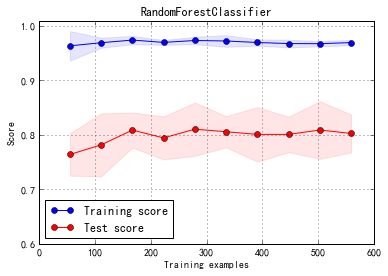

In [31]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve
 
# assume classifier and training data is prepared...
 
train_sizes, train_scores, test_scores = learning_curve(
        forest, x_tr, y_tr, cv=10, n_jobs=-1, train_sizes=np.linspace(.1, 1., 10), verbose=0)
 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
 
plt.figure()
plt.title("RandomForestClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.6, 1.01))
plt.grid()
plt.gca().invert_yaxis() 
# Plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test score")
plt.legend(loc="best")
# Plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="r")
plt.gca().invert_yaxis() 



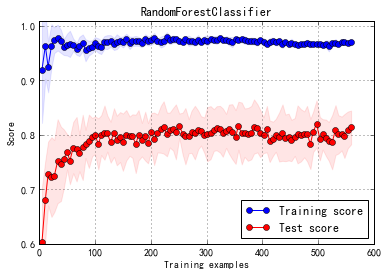

In [32]:
train_sizes, train_scores, test_scores = learning_curve(
        forest, x_tr, y_tr, cv=10, n_jobs=-1, train_sizes=np.linspace(.01, 1., 100), verbose=0)
 
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)
 
plt.figure()
plt.title("RandomForestClassifier")
plt.xlabel("Training examples")
plt.ylabel("Score")
plt.ylim((0.6, 1.01))
plt.grid()
plt.gca().invert_yaxis() 
# Plot the average training and test score lines at each training set size
plt.plot(train_sizes, train_scores_mean, 'o-', color="b", label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="r", label="Test score")
plt.legend(loc="best")
# Plot the std deviation as a transparent range at each training set size
plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, 
                 alpha=0.1, color="b")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, 
                 alpha=0.1, color="r")
plt.gca().invert_yaxis() 


### roc

ROC AUC: 0.83


C:\Users\j7jiang\AppData\Local\Continuum\Anaconda2\envs\py35\lib\site-packages\sklearn\ensemble\forest.py:439: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable oob estimates.
  warn("Some inputs do not have OOB scores. "


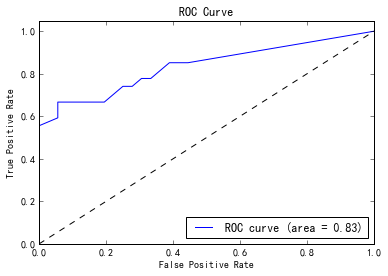

In [33]:
from sklearn.metrics import roc_curve, auc
 
# shuffle and split training and test sets
X_train, X_test, y_train, y_test = train_test_split(x_tr, y_tr, test_size=.1)
forest.fit(X_train, y_train)
 
# Determine the false positive and true positive rates
fpr, tpr, _ = roc_curve(y_test, forest.predict_proba(X_test)[:,1])
 
# Calculate the AUC
roc_auc = auc(fpr, tpr)
print('ROC AUC: %0.2f' % roc_auc)
 
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc="lower right")

## stacking

In [34]:
from sklearn.ensemble import VotingClassifier  
model=VotingClassifier(estimators=[('lr',lr),('svc',svc),('rf',randomf),('GDBT',gdbt)],voting='hard',weights=[0.5,1.5,0.6,0.6])  
model.fit(x_tr,y_tr)  
print(model.score(x_te,y_te))

0.817164179104


在船的左舷，救生船只载妇女和儿童。在右舷，则是妇女优先逃生之后允许男性登艇。所以，在右舷获救的人数比在左舷获救的多

## 预测

In [268]:
#预测数据  
data_test=pd.read_csv('../data/test.csv')  
data_test.drop(['Ticket'],axis=1,inplace=True)  
data_test.loc[data_test.Embarked.isnull(),'Embarked']='S'  
Sex_label_test=le_sex.transform(data_test['Sex'])  
Sex_ohe_test=ohe_sex.transform(Sex_label_test.reshape(-1,1))  
Embarked_label_test=le_embarked.transform(data_test['Embarked'])  
Embarked_ohe_test=ohe_embarked.transform(Embarked_label_test.reshape(-1,1))  
data_test['Name']=data_test['Name'].map(lambda x:replace_name(x))  
Name_label_test=le_name.transform(data_test['Name'])  
Name_ohe_test=ohe_name.transform(Name_label_test.reshape(-1,1))  
data_test['Sex_0']=Sex_ohe_test[:,0]  
data_test['Sex_1']=Sex_ohe_test[:,1]  
data_test['Embarked_0']=Embarked_ohe_test[:,0]  
data_test['Embarked_1']=Embarked_ohe_test[:,1]  
data_test['Embarked_2']=Embarked_ohe_test[:,2]  
data_test['Name_0']=Name_ohe_test[:,0]  
data_test['Name_1']=Name_ohe_test[:,1]  
data_test['Name_2']=Name_ohe_test[:,2]  
oh_pclass=OneHotEncoder(sparse=False).fit(data_test['Pclass'].values.reshape(-1,1))
class_ohe=oh_pclass.transform(data_test['Pclass'].values.reshape(-1,1))
data_test['Pclass_0']=class_ohe[:,0]
data_test['Pclass_1']=class_ohe[:,1]
data_test['Pclass_2']=class_ohe[:,2]
data_test.loc[data_test.Fare.isnull(),'Fare']=0  
data_test['Fare_scaled']=StandardScaler().fit_transform(data_test['Fare'].values.reshape(-1,1),Fare_scale)  
data_test['SibSp_scaled']=StandardScaler().fit_transform(data_test['SibSp'].values.reshape(-1,1),SibSp_scale)  
data_test['Parch_scaled']=StandardScaler().fit_transform(data_test['Parch'].values.reshape(-1,1),Parch_scale)  
train_test=data_test[['Age','SibSp_scaled','Parch_scaled','Name_0','Name_1','Name_2','Sex_0','Sex_1','Pclass_0','Pclass_1','Pclass_2']]  
unknown_age_test=train_test[train_test.Age.isnull()].as_matrix()  
x_test=unknown_age_test[:,1:]  
predictage=rf.predict(x_test)  
data_test.loc[data_test.Age.isnull(),'Age']=predictage  
data_test['Age_scaled']=StandardScaler().fit_transform(data_test['Age'].reshape(-1,1))  
test_x=data_test[['Sex_0','Sex_1','Embarked_0','Embarked_1','Embarked_2','Name_0','Name_1','Name_2',
                  'Pclass_0','Pclass_1','Pclass_2','Age_scaled','Fare_scaled','SibSp_scaled']].as_matrix()  
predictions=grid_search.predict(test_x).astype(np.int32)
result=pd.DataFrame({'PassengerId':data_test['PassengerId'].as_matrix(),'Survived':predictions})  
result.to_csv('results.csv',index=False)  

C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:26: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:27: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Anaconda\envs\py35\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, _DataConversionWarning)
C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:28: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
C:\Anaconda\envs\py35\lib\site-packages\ipykernel\__main__.py:34: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead


## 意料之外

In [35]:
mask=grid_search.predict(train_x[:,:-1])!=train_y

In [36]:
o_data=pd.read_csv('../data/train.csv')

In [37]:
o_data[mask].shape

(140, 12)

In [38]:
wrong=o_data[mask]

In [39]:
wrong_p1=wrong[wrong['Pclass']==1]

In [40]:
wrong_p1[wrong_p1['Sex']=='female']

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
177,178,0,1,"Isham, Miss. Ann Elizabeth",female,50.0,0,0,PC 17595,28.7125,C49,C
297,298,0,1,"Allison, Miss. Helen Loraine",female,2.0,1,2,113781,151.5500,C22 C26,S
498,499,0,1,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0,1,2,113781,151.5500,C22 C26,S


https://www.encyclopedia-titanica.org/titanic-first-class-passengers/
![](./img/allison.jpg)

去找儿子Trevor了!


预测结果里面，passengerId=1094的Astor, Col. John Jacob会生还
![](./img/astor.jpg)

预测 949	3	Abelseth, Mr. Olaus Jorgensen	male	25	0	0	348122	7.65 没有生还
![](./img/olaus.jpg)

船沉了后他在冰冷的水里游了20分钟！！！然后爬上了幸存者的船